In this the capping technique is called winsorisation where we set a threshold, let us say

any value above 99th percentile value is an outlier, then symetrically any value lower than 1th percentile value is an outlier

the higher the value of the percentile, the lesser the number of outliers

so experiment which combo works best : 99.5, 0.5  ? etc.

In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('weight-height.csv')


In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(10000, 3)

/tmp/ipython-input-145553632.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

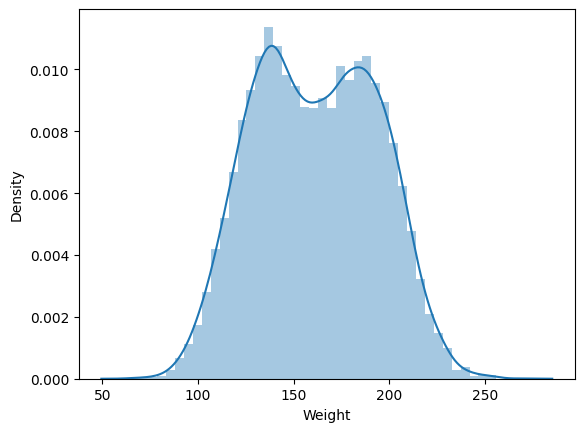

In [7]:
import seaborn as sns
sns.distplot(df['Weight'])

In [5]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [9]:
df['Height'].quantile(0.99)

np.float64(74.7857900583366)

In [16]:
df['Height'].quantile(1)

np.float64(78.9987423463896)

/tmp/ipython-input-3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

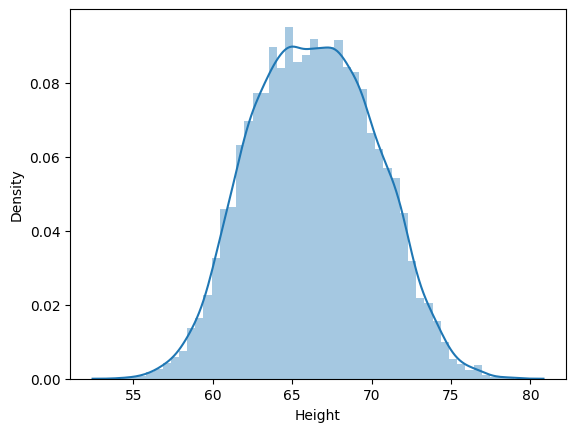

In [8]:
sns.distplot(df['Height'])

<Axes: xlabel='Height'>

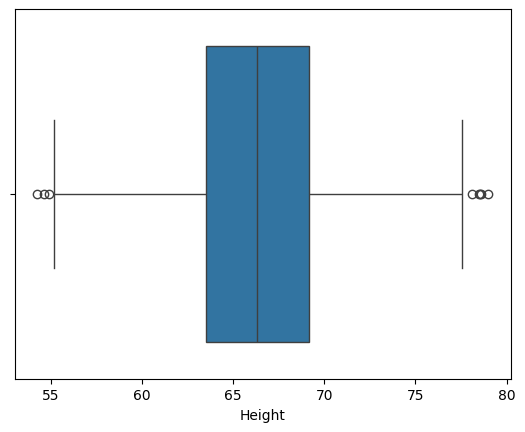

In [18]:
sns.boxplot(x=df['Height'])

In [19]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

np.float64(74.7857900583366)

In [20]:
lower_limit = df['Height'].quantile(0.01)
lower_limit

np.float64(58.13441158671655)

*trimming*

In [21]:
new_df = df[
    (df['Height'] >= lower_limit) &
    (df['Height'] <= upper_limit)
]


In [22]:
new_df['Height'].describe()

,Height
count,9800.000000
mean,66.364366
std,3.645075
min,58.134496
25%,63.577162
50%,66.318070
75%,69.119896
max,74.785714


In [23]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


/tmp/ipython-input-1622920233.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

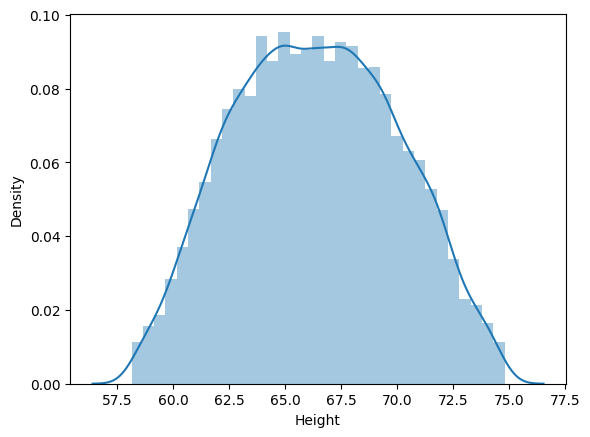

In [24]:
sns.distplot(new_df['Height'])

<Axes: xlabel='Height'>

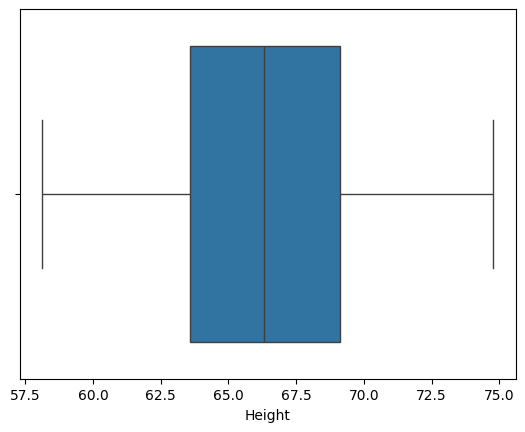

In [25]:
sns.boxplot(x=new_df['Height'])

*2) Capping -> Winsorization*

In [26]:
df['Height'] = np.where(
    df['Height'] > upper_limit,
    upper_limit,
    np.where(
        df['Height'] < lower_limit,
        lower_limit,
        df['Height']
    )
)

In [27]:
df.shape

(10000, 3)

In [28]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.366281
std,3.795717
min,58.134412
25%,63.505620
50%,66.318070
75%,69.174262
max,74.785790


/tmp/ipython-input-3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

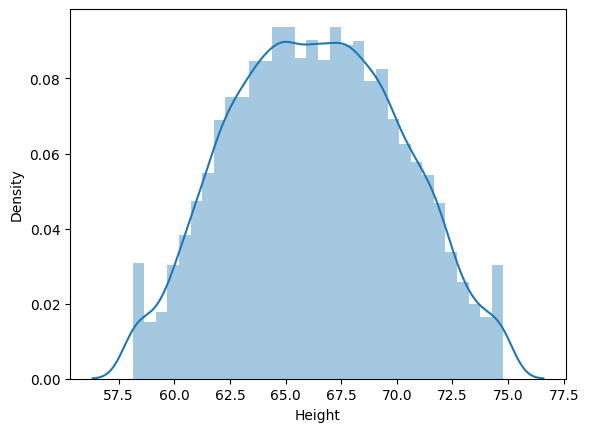

In [29]:
sns.distplot(df['Height'])

we can see there are peaks around the upper limit and lower limit values because outliers were capped to these values, increasing the no of values at these points

<Axes: xlabel='Height'>

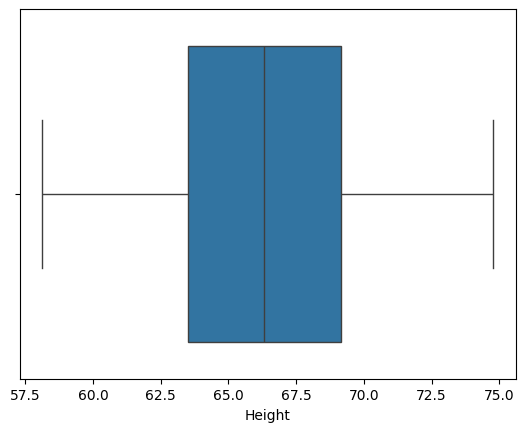

In [31]:
sns.boxplot(x=df['Height'])